In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("power_data_labeled.csv")  # Replace with your actual CSV filename
df.head()

,line_voltage,label,c1,c2,c3,feeder
0,9.21,normal,0.925,0.912,0.931,2.441
1,9.99,normal,1.006,0.972,1.043,2.707
2,8.55,c3,0.870,0.889,1.022,2.537
3,11.10,c2,1.138,1.491,1.180,3.547
4,11.80,c2,1.214,1.319,1.186,3.424


In [3]:
# Preprocess the Data
# 1.1 Convert labels to numeric values
label_map = {
    "normal": 0,
    "c1": 1,
    "c2": 2,
    "c3": 3
}
df['label'] = df['label'].map(label_map)

# 1.2 Separate features and target
X = df[['line_voltage', 'c1', 'c2', 'c3', 'feeder']]
y = df['label']

# 1.3 Normalize the feature columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for future use
import joblib
joblib.dump(scaler, "scaler.pkl")

# View scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()

,line_voltage,c1,c2,c3,feeder
0,-0.695690,-0.863446,-0.819076,-0.813643,-1.072646
1,-0.023645,-0.263297,-0.395460,0.001043,-0.337019
2,-1.264343,-1.270955,-0.981462,-0.151711,-0.807157
3,0.932726,0.714723,3.268819,0.997577,1.986012
4,1.535844,1.277826,2.054453,1.041221,1.645854


In [4]:
# Split the data
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check shapes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (2400, 5), X_test: (600, 5)
y_train: (2400,), y_test: (600,)


In [5]:
# Train the model
from sklearn.svm import SVC

# Radial basis function kernel (RBF) SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(svm_model, "theft_detector_svm.pkl")

['theft_detector_svm.pkl']

In [6]:
# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = svm_model.predict(X_test)

# Generate evaluation reports
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       368
           1       1.00      0.93      0.97        75
           2       1.00      0.94      0.97        86
           3       1.00      1.00      1.00        71

    accuracy                           0.98       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.98      0.98      0.98       600

=== Confusion Matrix ===
[[368   0   0   0]
 [  5  70   0   0]
 [  5   0  81   0]
 [  0   0   0  71]]


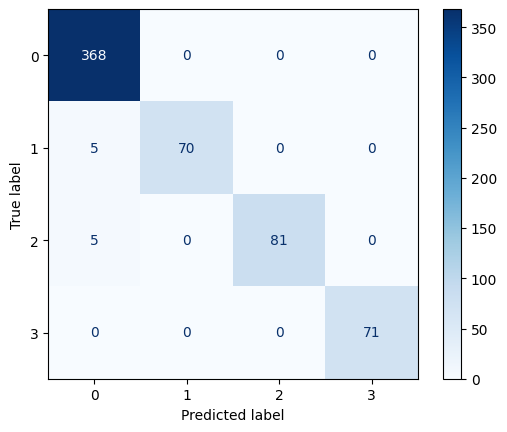

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Replace these with your actual y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


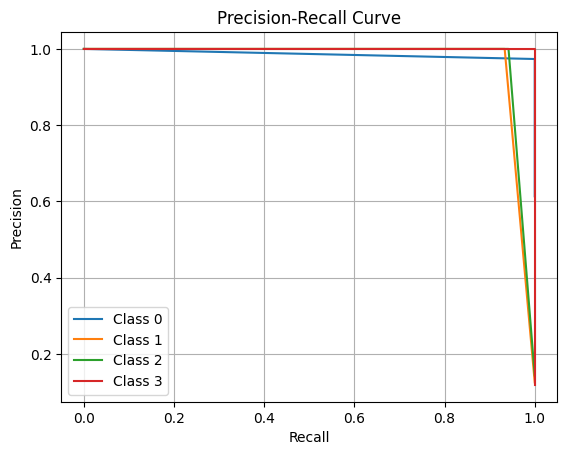

In [8]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are available
# And your classes are [0, 1, 2, 3]
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])

for i in range(4):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
